**Note:** In this lecture there is a lot of code. You are not expected to know any of this yet. This is just a preview of the things you will see in the next few weeks. 


## This is a Jupyter Notebook

A Jupyter Notebook is a data-science environment that combines:

1. **Narrative:** The text describing your analysis
2. **Code:** The program that does the analysis
3. **Results:** The output of the program

The Jupyter environment was created by faculty here at Berkeley (Fernando Perez). These ideas are now in a lot of different technologies (e.g., Google Collab). 


## Our first example: analyzing the text of popular books

We can use the tools of data science to study text.  For example, here we will do some basic analysis of *["Adventures of Huckleberry Finn"](https://en.wikipedia.org/wiki/Adventures_of_Huckleberry_Finn)* (by Mark Twain) and from *["Little Women"](https://en.wikipedia.org/wiki/Little_Women)* (by Louisa May Alcott).  

Often the first step in data sciences is getting the data.  The following is a tiny program to download text from the web. More specifically, what you see below is a **function**. We will talk more about functions later on!

In [ ]:
# A tiny program to download text from the web.
def read_url(url):
    from urllib.request import urlopen
    import re

    return re.sub("\\s+", " ", urlopen(url).read().decode())

Here we download the books, which are actually hosted on the Data 8 textbook website.

In [ ]:
huck_finn_url = "https://www.inferentialthinking.com/data/huck_finn.txt"
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split("CHAPTER ")[44:]

## Tables

- A lot of data science is about transforming data. This is often in service of producing **tables**, a widely used data structure that we can more easily analyze our data with. 
- In this class you will use the `datascience` library (specifically created for this course!!) to manipulate and data.

In [ ]:
import datascience

datascience.__version__

/home/sknapp/miniconda3/envs/dh/lib/python3.11/site-packages/datascience/maps.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


'0.17.6'

In [ ]:
from datascience import *

In [ ]:
Table().with_column("Chapters", huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


## We will learn to summarize data

We will explore data by extracting summaries. For example, we might ask, how often characters appeared in each chapter. We can use snippets of code to answer these questions.

In [ ]:
import numpy as np

In [ ]:
np.char.count(huck_finn_chapters, "Tom")

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [ ]:
np.char.count(huck_finn_chapters, "Jim")

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

We can convert the results of our analysis into more tables.

In [ ]:
counts = Table().with_columns(
    [
        "Tom",
        np.char.count(huck_finn_chapters, "Tom"),
        "Jim",
        np.char.count(huck_finn_chapters, "Jim"),
        "Huck",
        np.char.count(huck_finn_chapters, "Huck"),
    ]
)
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


## We will learn to visualize data

- How many times is each character mentioned in Chapter 1, how many times in Chapters 1 and 2, and so on?
- As we saw above, we could answer this with a table, but there are a lot of chapters!! Let's try something else.

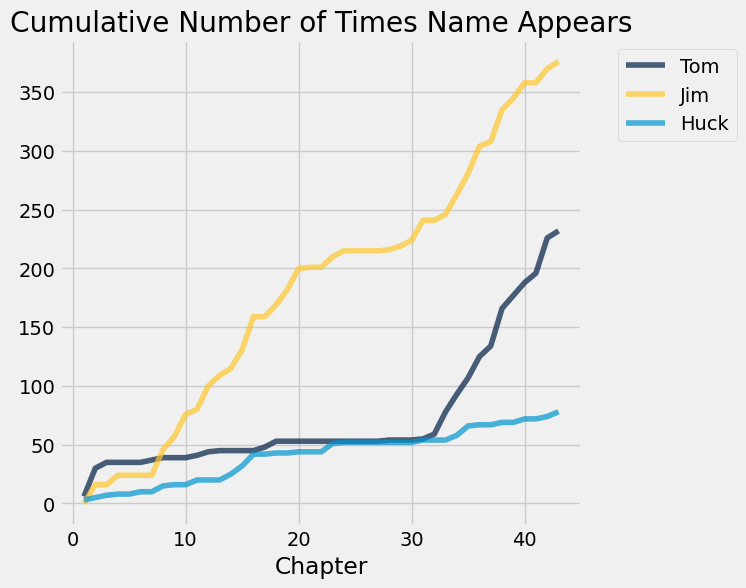

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
cum_counts_tom = np.cumsum(counts.column("Tom"))
cum_counts_jim = np.cumsum(counts.column("Jim"))
cum_counts_huck = np.cumsum(counts.column("Huck"))
cumulative_table = Table().with_columns(
    "Chapter",
    np.arange(1, 44, 1),
    "Tom",
    cum_counts_tom,
    "Jim",
    cum_counts_jim,
    "Huck",
    cum_counts_huck,
)
cumulative_table.plot(column_for_xticks="Chapter")
plt.title("Cumulative Number of Times Name Appears")
plt.show()